
## Types of Feature Scaling

### 1. Standardization (Z-score Normalization) 
    
- Formula :  x-mean / s.d
- Mean = 0 , S.D=1

- We can use standardization in any of the case , there is no problem.
- Only the scale will change , distribution will remain same.
- There are certain algorithm which does not changes w.r.t to scaling such as decision tree , with or without scaling the accuracy will be same.
- Algorithm where scaling is required are k-means,KNN,PCA,ANN,Gradient Descent.
- Because we have to calculate the distance.
- The Outliers will remain the same after applying scaling it cannot be handled using scaling option , the distribution will remain same.
- Effect of outliers cannot be controlled.


### 2. Normalization

- Goal of Normalization is to change the values of numeric columns in dataset to use a common scale without distorting differences in range of values or losing information

- To estimate the units .


### Types of Normalization

### 1. MinMax Scaling 

- Formula : xi-xmin/xmax-xmin  
- O/P will range in (0,1)


### 2.Robust Scaling

- Formula = xi - Xmedian / IQR
- Robust to outliers - If there is outliers available in data then we can use robust scaling
- Robustscaling class is available in sklearn library.


### 3.Mean Normalization

- Formula = xi-xmean/xmax-xmin  
- Bringing the data around mean centric.
- There is no code available in sklearn for this scaling , need to write the code.


### 4.Max Absolute Scaling

- Formula = xi / |xmax|
- MaxAbsscaler class is available in sklearn library.
- Used when there is sparse matrix available.




In [26]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 

import warnings
warnings.filterwarnings('ignore')

In [27]:
df= pd.read_csv("D:\\Sandesh\\100-days-of-machine-learning\\day24-standardization\\Social_Network_Ads.csv")
df.head()                

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [28]:
df = df[['Age','EstimatedSalary','Purchased']]
df.sample(5)

,Age,EstimatedSalary,Purchased
80,30,80000,0
158,26,30000,0
42,35,108000,0
40,27,17000,0
286,37,62000,0


In [29]:
X=df.iloc[:,0:2]
y=df.iloc[:,2]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=1)


### StandardScaler

In [30]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

# In fit we will calculate the mean and SD.
scaler.fit(X_train)

# In transform we will apply the mean,SD to all the values available.
X_train_scaled= scaler.transform(X_train)
X_test_scaled= scaler.transform(X_test)

# The o/p that we get is in the form of numpy array.
# Thus to convert that into dataframe 

X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)


### Effect of Scaling 

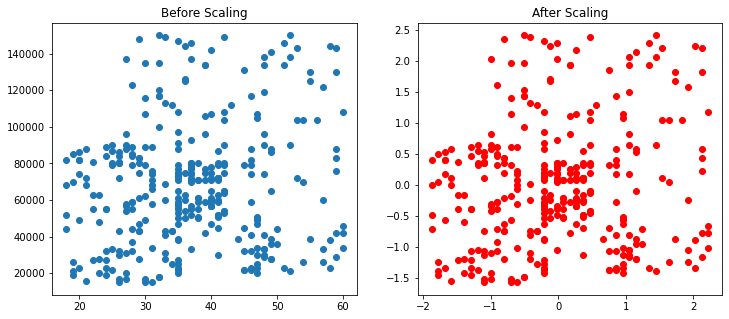

In [31]:

# Check the scaling of values before and after applying scaling.
# Only the scale changes , distribution remains same.

fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")

plt.show()


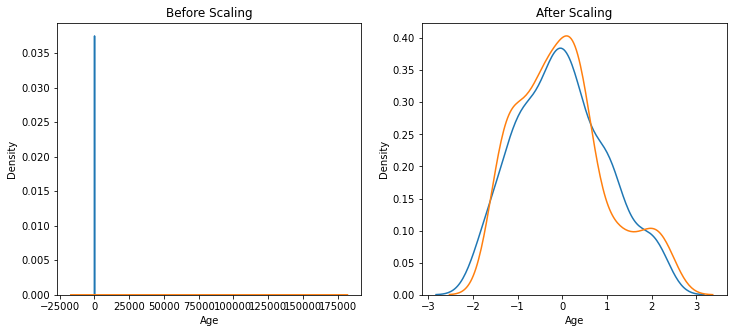

In [32]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

ax1.set_title("Before Scaling")
sns.kdeplot(X_train['Age'],ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)

ax2.set_title("After Scaling")
sns.kdeplot(X_train_scaled['Age'],ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2)

plt.show()

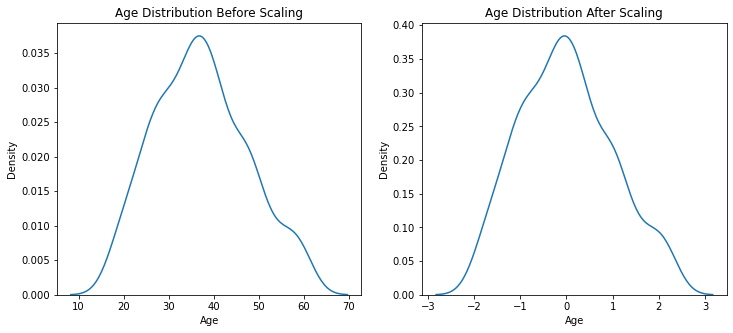

In [33]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

ax1.set_title("Age Distribution Before Scaling")
sns.kdeplot(X_train['Age'],ax=ax1)

ax2.set_title("Age Distribution After Scaling")
sns.kdeplot(X_train_scaled['Age'],ax=ax2)

plt.show()

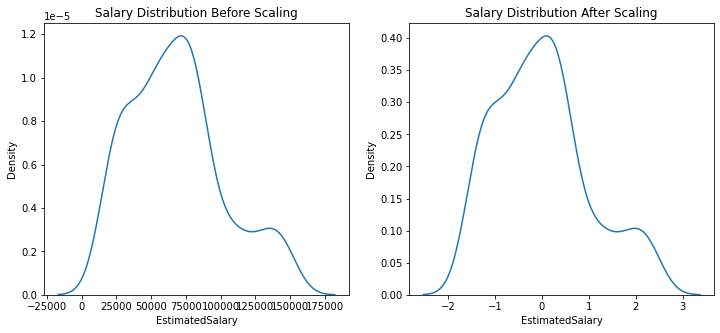

In [34]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

ax1.set_title("Salary Distribution Before Scaling")
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)

ax2.set_title("Salary Distribution After Scaling")
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2)

plt.show()

### Applying standardization to 2 different algoirthm to check accuracy is changing or not .

In [35]:

# In Logistic regression , before and after scaling the accuray is getting 
# changed.

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression()
lr_scaled=LogisticRegression()

lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

y_pred=lr.predict(X_test)
y_pred_scaled=lr_scaled.predict(X_test_scaled)

print("Before Scaling",accuracy_score(y_test,y_pred))
print("After Scaling",accuracy_score(y_test,y_pred_scaled))


Before Scaling 0.6
After Scaling 0.8375


In [36]:

# In Decision tree, there is no change before and after applying scaling in accuracy.

from sklearn.tree import DecisionTreeClassifier

lr = DecisionTreeClassifier()
lr_scaled=DecisionTreeClassifier()

lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

y_pred=lr.predict(X_test)
y_pred_scaled=lr_scaled.predict(X_test_scaled)

print("Before Scaling",accuracy_score(y_test,y_pred))
print("After Scaling",accuracy_score(y_test,y_pred_scaled))

Before Scaling 0.825
After Scaling 0.8


### Impact of Outliers

In [43]:
(X_train.describe())

,Age,EstimatedSalary
count,320.000000,320.000000
mean,37.237500,68293.750000
std,10.270625,33878.650655
min,18.000000,15000.000000
25%,29.000000,43000.000000
50%,37.000000,65000.000000
75%,45.000000,85250.000000
max,60.000000,150000.000000


In [52]:

# Adding 2 outliers values and checking whether it is getting handled by 
# applying scaling or not.

df=df.append(pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[10000,250000,350000],
                              'Purchased':[0,1,1]
                          }))


df.head()


,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


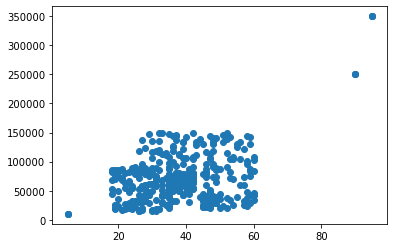

In [53]:
plt.scatter(df['Age'],df['EstimatedSalary'])

In [54]:
X=df.iloc[:,0:2]
y=df.iloc[:,2]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=1)


In [55]:
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [56]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)


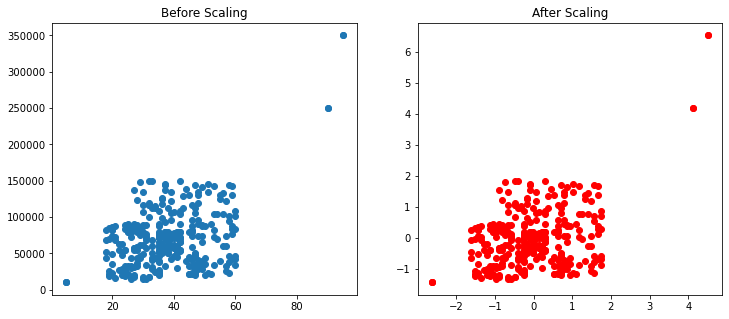

In [57]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")

plt.show()

### After scaling as well the outliers is not handled.


###  Normalization 


In [58]:
df=pd.read_csv("D://Sandesh//100-days-of-machine-learning//day25-normalization//wine_data.csv",header=None,usecols=[0,1,2])
df.columns=['Class_label','Alcohol','Malic_acid']
df.head()

,Class_label,Alcohol,Malic_acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


In [59]:
df.shape

(178, 3)

<AxesSubplot:xlabel='Alcohol', ylabel='Density'>

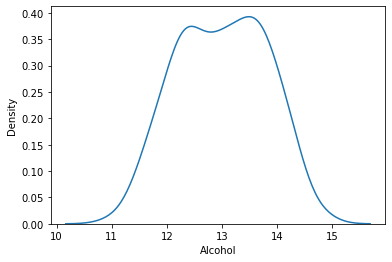

In [60]:
sns.kdeplot(df['Alcohol'])

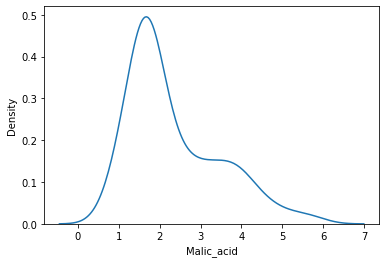

In [61]:
sns.kdeplot(df['Malic_acid'])
plt.show()

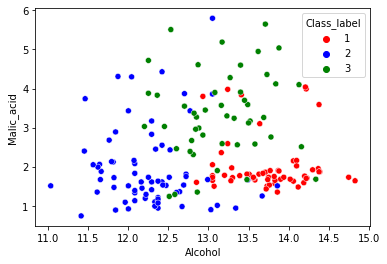

In [62]:
color_dict={1:'red',2:'blue',3:'green'}
sns.scatterplot(df['Alcohol'],df['Malic_acid'],hue=df['Class_label'],
               palette=color_dict)
plt.show()

In [63]:
X=df.drop(columns=['Class_label'],axis=1)
y=df['Class_label']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=1)


In [64]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)


In [65]:
np.round(X_train.describe(),2)

,Alcohol,Malic_acid
count,142.00,142.00
mean,12.99,2.40
std,0.80,1.17
min,11.03,0.90
25%,12.35,1.59
50%,13.05,1.88
75%,13.66,3.22
max,14.83,5.80


In [66]:
np.round(X_train_scaled.describe(),2)

,Alcohol,Malic_acid
count,142.00,142.00
mean,0.52,0.31
std,0.21,0.24
min,0.00,0.00
25%,0.35,0.14
50%,0.53,0.20
75%,0.69,0.47
max,1.00,1.00


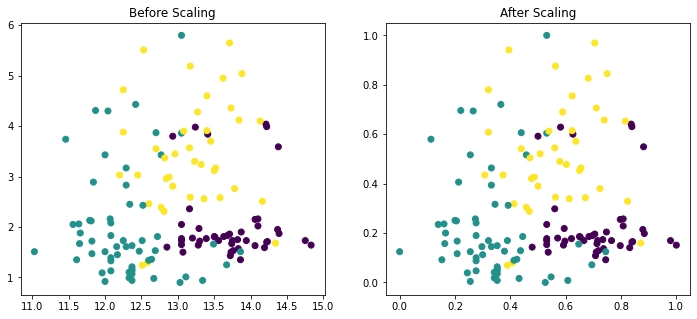

In [67]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

ax1.scatter(X_train['Alcohol'],X_train['Malic_acid'],c=y_train)
ax1.set_title("Before Scaling")

ax2.scatter(X_train_scaled['Alcohol'],X_train_scaled['Malic_acid'],c=y_train)
ax2.set_title("After Scaling")

plt.show()


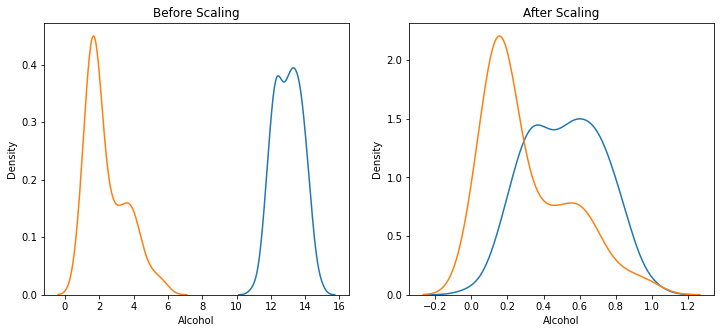

In [68]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

# Before Scaling

ax1.set_title("Before Scaling")
sns.kdeplot(X_train['Alcohol'],ax=ax1)
sns.kdeplot(X_train['Malic_acid'],ax=ax1)

# After Scaling

ax2.set_title("After Scaling")
sns.kdeplot(X_train_scaled['Alcohol'],ax=ax2)
sns.kdeplot(X_train_scaled['Malic_acid'],ax=ax2)
plt.show()


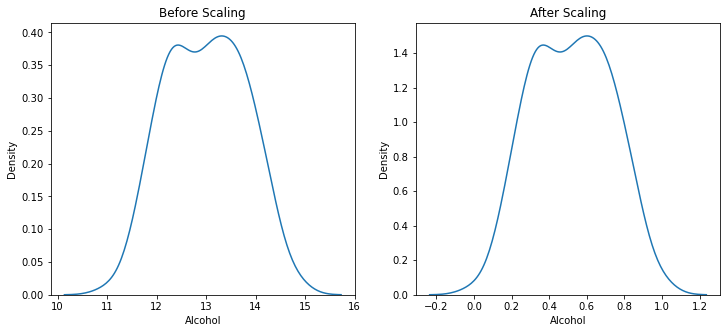

In [69]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

# Before Scaling

ax1.set_title("Before Scaling")
sns.kdeplot(X_train['Alcohol'],ax=ax1)

# After Scaling

ax2.set_title("After Scaling")
sns.kdeplot(X_train_scaled['Alcohol'],ax=ax2)
plt.show()

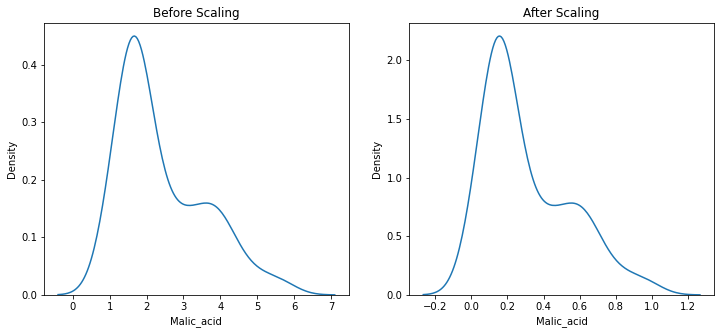

In [70]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

# Before Scaling

ax1.set_title("Before Scaling")
sns.kdeplot(X_train['Malic_acid'],ax=ax1)

# After Scaling

ax2.set_title("After Scaling")
sns.kdeplot(X_train_scaled['Malic_acid'],ax=ax2)
plt.show()

### Normalization VS Standardization

- Is Feature scaling required in given problem or not.

- For most of the problem , standardization perform well.

- Normalization is used , when we know the min  , max values , eg in images data where we know the min and max values.




### THE END 